In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import shap

import pandas as pd
import scipy.stats as ss
from scipy.stats import dirichlet
from sklearn.model_selection import train_test_split
import seaborn as sns
#import plotly
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import lime
import external_exp_metric_function as eemf
from sklearn.metrics import balanced_accuracy_score, precision_score, f1_score, recall_score

/Users/svennomm/miniconda3/envs/p311clean/lib/python3.11/site-packages/shap/utils/_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/svennomm/miniconda3/envs/p311clean/lib/python3.11/site-packages/shap/utils/_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/svennomm/miniconda3/envs/p311clean/lib/python3.11/sit

In [2]:
with open('practice_data_set.pkl', 'rb') as handle:
    data = pkl.load(handle)

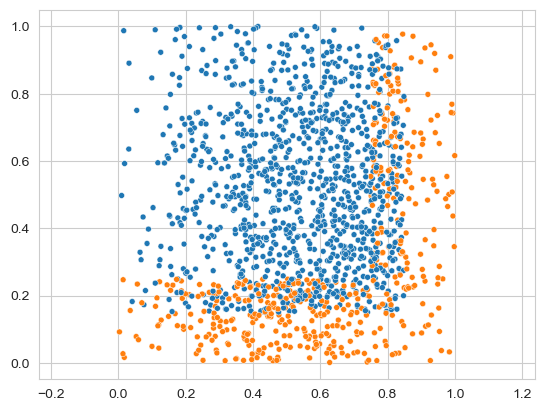

In [3]:

fig_1, ax_1 = plt.subplots()
ax_1 = sns.scatterplot(x=data[:, 0],  y=data[:, 1],  hue=data[:, 2], size=1)
ax_1.axis('equal')
plt.legend([],[], frameon=False)
plt.show()

In [4]:
train_set, test_set = train_test_split(data, test_size=0.3, train_size=0.7)
classifier = DecisionTreeClassifier()
classifier.fit(train_set[:, 0:2], train_set[:, 2])

DecisionTreeClassifier()

In [5]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(train_set[:, 0:2], feature_names=['x', 'y'], discretize_continuous=False)

instance = test_set[10, 0:2]
print(instance)

explanation = explainer.explain_instance(instance, classifier.predict_proba, num_samples=10)


[0.43118432 0.20129881]


In [ ]:
explanation.show_in_notebook(show_table=True)

In [8]:
print(explanation.as_list())

[('x', 0.0), ('y', 0.0)]


In [7]:
import shap

In [8]:
explainer = shap.Explainer(classifier.predict, test_set[:, 0:2])

AttributeError: module 'numpy' has no attribute 'bool'

In [6]:
shap_values = explainer(test_set[4, 0:2])

NameError: name 'explainer' is not defined